<a href="https://colab.research.google.com/github/Bang-seok/2022_ETRI/blob/main/mainV7_SKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
2022년도 ETRI 트래픽 예측 성능 향상 코드1

Original, Trend + Detrend, Trend + Seasonal 데이터를 활용한 딥러닝 모델을 설계할 때, 모델을 최적화하는데 사용
- 모델 파라미터 설정
- 모델 과대적합 여부 확인
- 그래프를 통한 비교
"""

'\n2022년도 ETRI 트래픽 예측 성능 향상 코드1\n\nOriginal, Trend + Detrend, Trend + Seasonal 데이터를 활용한 딥러닝 모델을 설계할 때, 모델을 최적화하는데 사용\n- 모델 파라미터 설정\n- 모델 과대적합 여부 확인\n- 그래프를 통한 비교\n'

In [ ]:
!pip install pmdarima # Arima를 다루는 tool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm # 통계 라이브러리.

import seaborn as SNS # 시각화
#%matplotlib inline
import itertools

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/prediction')

Mounted at /content/drive


In [ ]:
#%cd /content/drive/My Drive/Colab Notebooks/prediction
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SKT/SKT_Apart8.csv',header=None)
df.index = pd.date_range(start="2020-08-01 00:00", end="2020-08-31 23:00",freq="1H")
#df.head()

In [ ]:
dfs = dict() #SKT 강남역 아파트 8개 셀의 Original, Trend, Seasonal, Detrend를 저장해주기 위한 Dictionary
for i in range(8):
    dfs[i] = df[i].copy()

In [ ]:
#결측치(보간법으로 데이터를 채워넣었다)
count = 0;
for i in range(len(dfs)):
    print("----------------", i, "번째 기지국-----------------")
    for j in range(len(dfs[0])):
        if dfs[i][j] == 0:
            dfs[i][j] = (dfs[i][j-1] + dfs[i][j+1]) / 2
            print("변경된 값: ", dfs[i][j-1], dfs[i][j], dfs[i][j+1])
            count = count + 1
    print(i, "번째 기지국 결측치 개수: ", count)
    count = 0

---------------- 0 번째 기지국-----------------
변경된 값:  512475 713213 913951
변경된 값:  1419954 1280751 1141549
변경된 값:  1141549 570774 0
변경된 값:  570774 1054109 1537445
변경된 값:  1374666 687333 0
변경된 값:  687333 1224335 1761338
변경된 값:  1697561 1570898 1444236
변경된 값:  1271924 1478735 1685546
변경된 값:  1528098 764049 0
변경된 값:  764049 382024 0
변경된 값:  382024 191012 0
변경된 값:  191012 95506 0
변경된 값:  95506 1020960 1946415
변경된 값:  1946415 973207 0
변경된 값:  973207 486603 0
변경된 값:  486603 853381 1220159
변경된 값:  1543449 1391639 1239830
변경된 값:  1282034 1373323 1464613
변경된 값:  1302513 1029702 756891
변경된 값:  799715 1225519 1651323
변경된 값:  2269102 1945243 1621385
변경된 값:  1516354 758177 0
변경된 값:  758177 379088 0
변경된 값:  379088 674666 970244
0 번째 기지국 결측치 개수:  24
---------------- 1 번째 기지국-----------------
변경된 값:  1544115 1202237 860360
변경된 값:  1027416 1003135 978855
1 번째 기지국 결측치 개수:  2
---------------- 2 번째 기지국-----------------
변경된 값:  1867525 2018551 2169577
변경된 값:  2278973 1746949 1214926
2 번째 기지국 결측치 개수:  2
------

In [ ]:
#dfs 데이터를 DataFrame으로 변경.
for i in range(len(dfs)):
    dfs[i] = pd.DataFrame(dfs[i])
    dfs[i] = dfs[i].rename(columns={i: 'Original'})

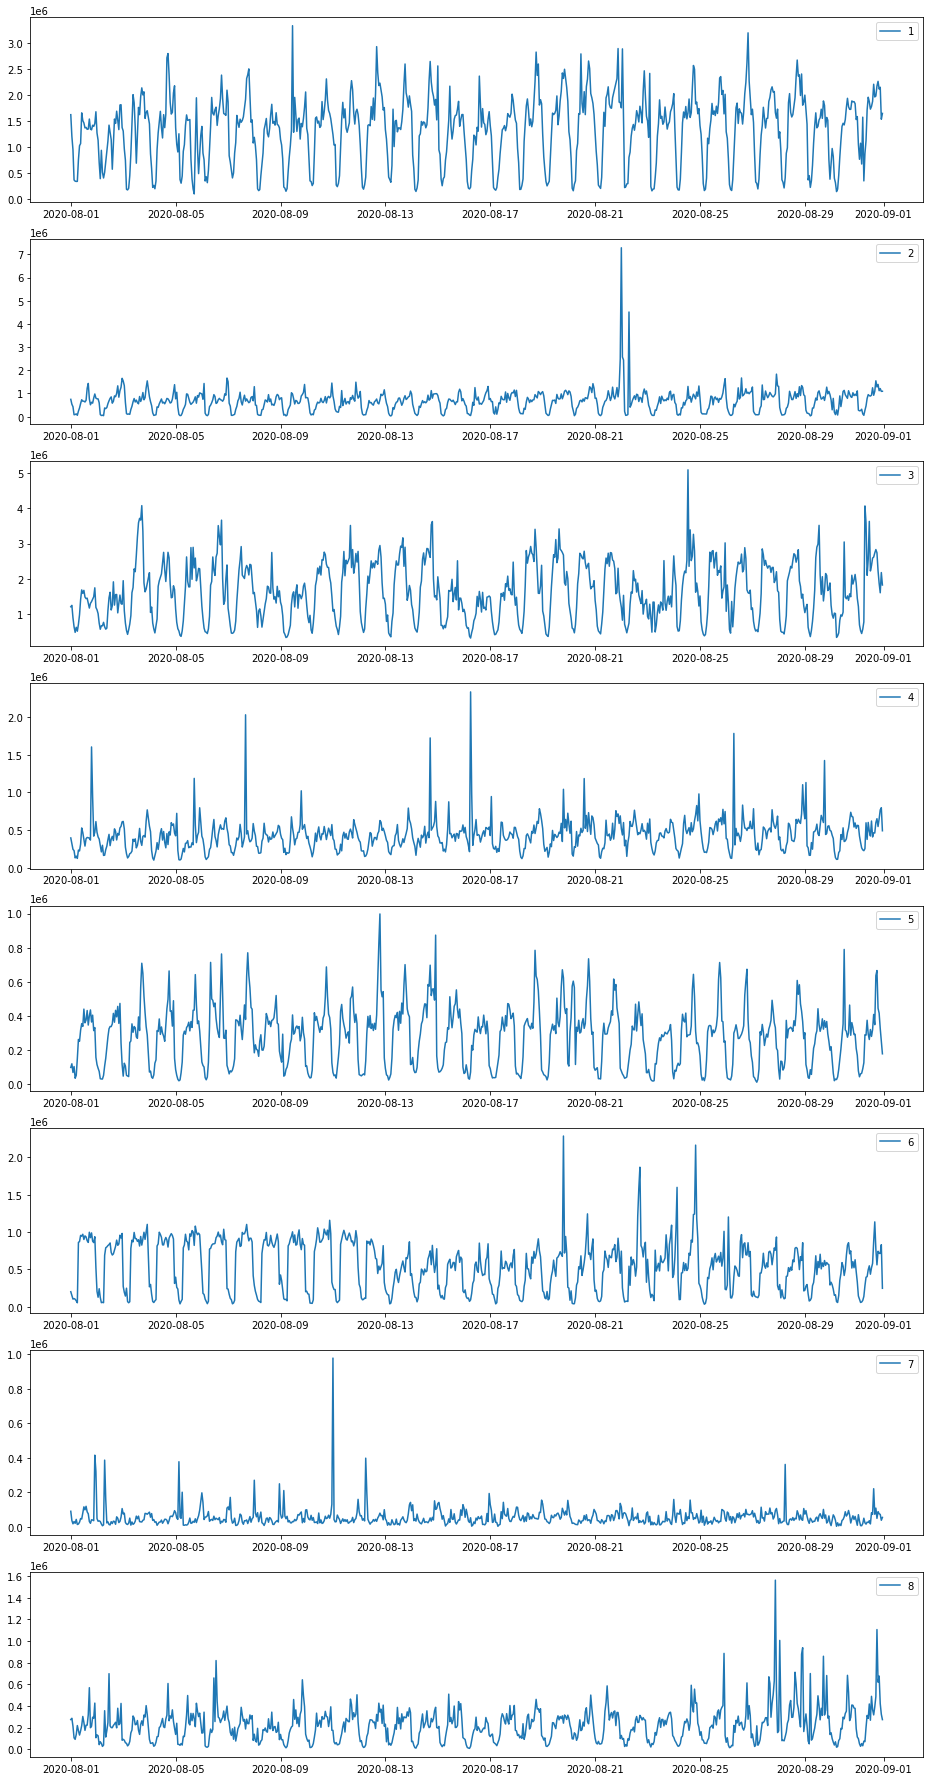

In [ ]:
plt.rcParams['figure.figsize'] = (16, 32)
plt.subplot(8, 1, 1)
plt.plot(dfs[0], label = '1')
plt.legend()

plt.subplot(8, 1, 2)
plt.plot(dfs[1], label = '2')
plt.legend()

plt.subplot(8, 1, 3)
plt.plot(dfs[2], label = '3')
plt.legend()

plt.subplot(8, 1, 4)
plt.plot(dfs[3], label = '4')
plt.legend()

plt.subplot(8, 1, 5)
plt.plot(dfs[4], label = '5')
plt.legend()

plt.subplot(8, 1, 6)
plt.plot(dfs[5], label = '6')
plt.legend()

plt.subplot(8, 1, 7)
plt.plot(dfs[6], label = '7')
plt.legend()

plt.subplot(8, 1, 8)
plt.plot(dfs[7], label = '8')
plt.legend()

plt.show()

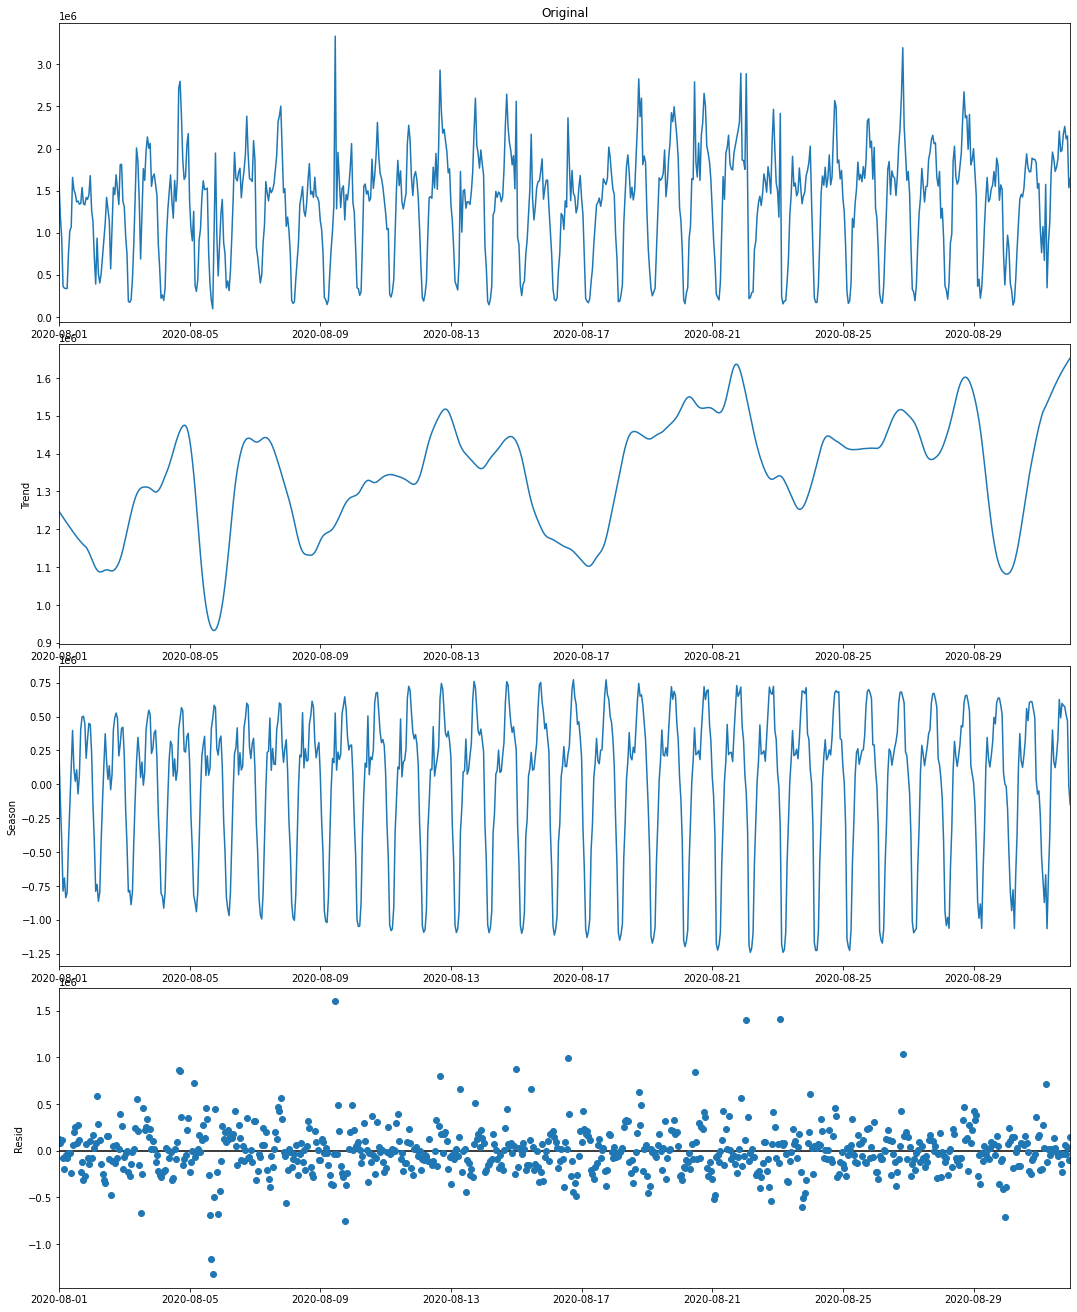

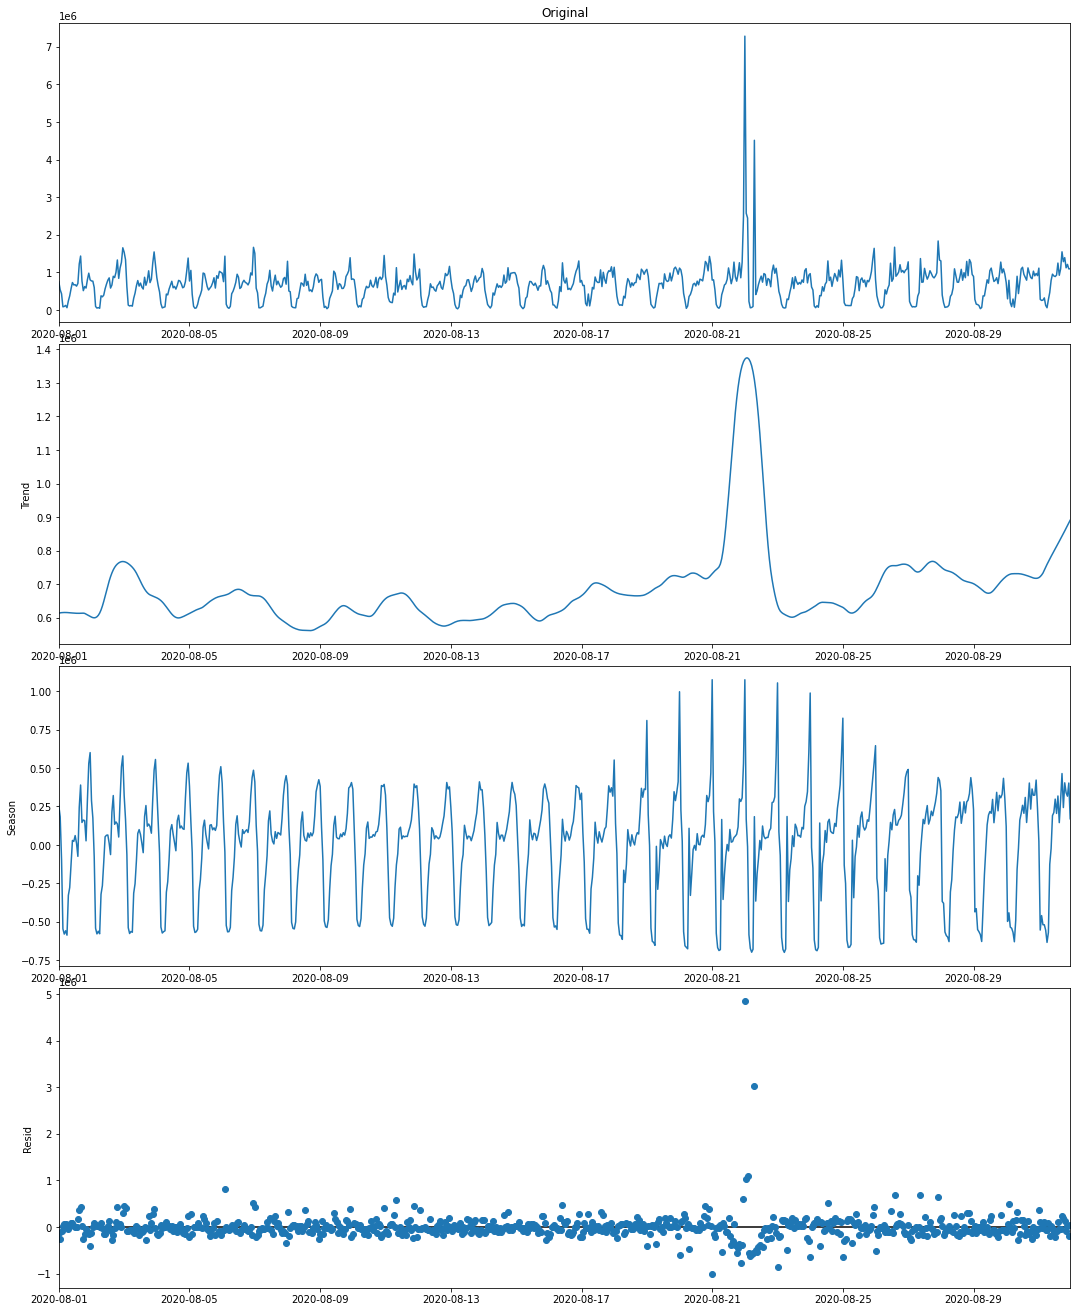

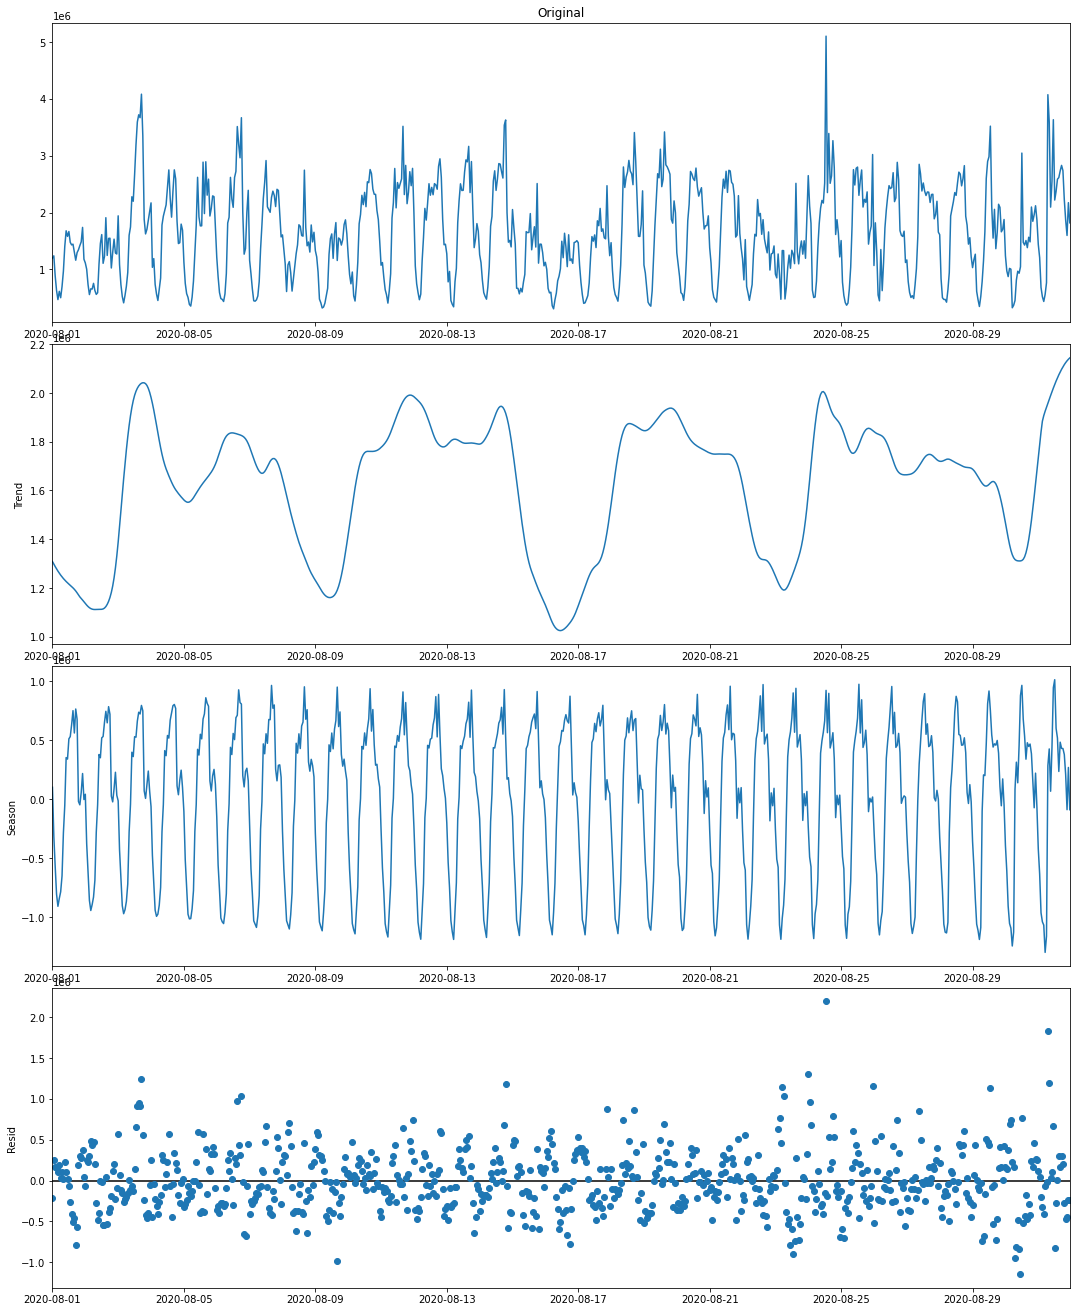

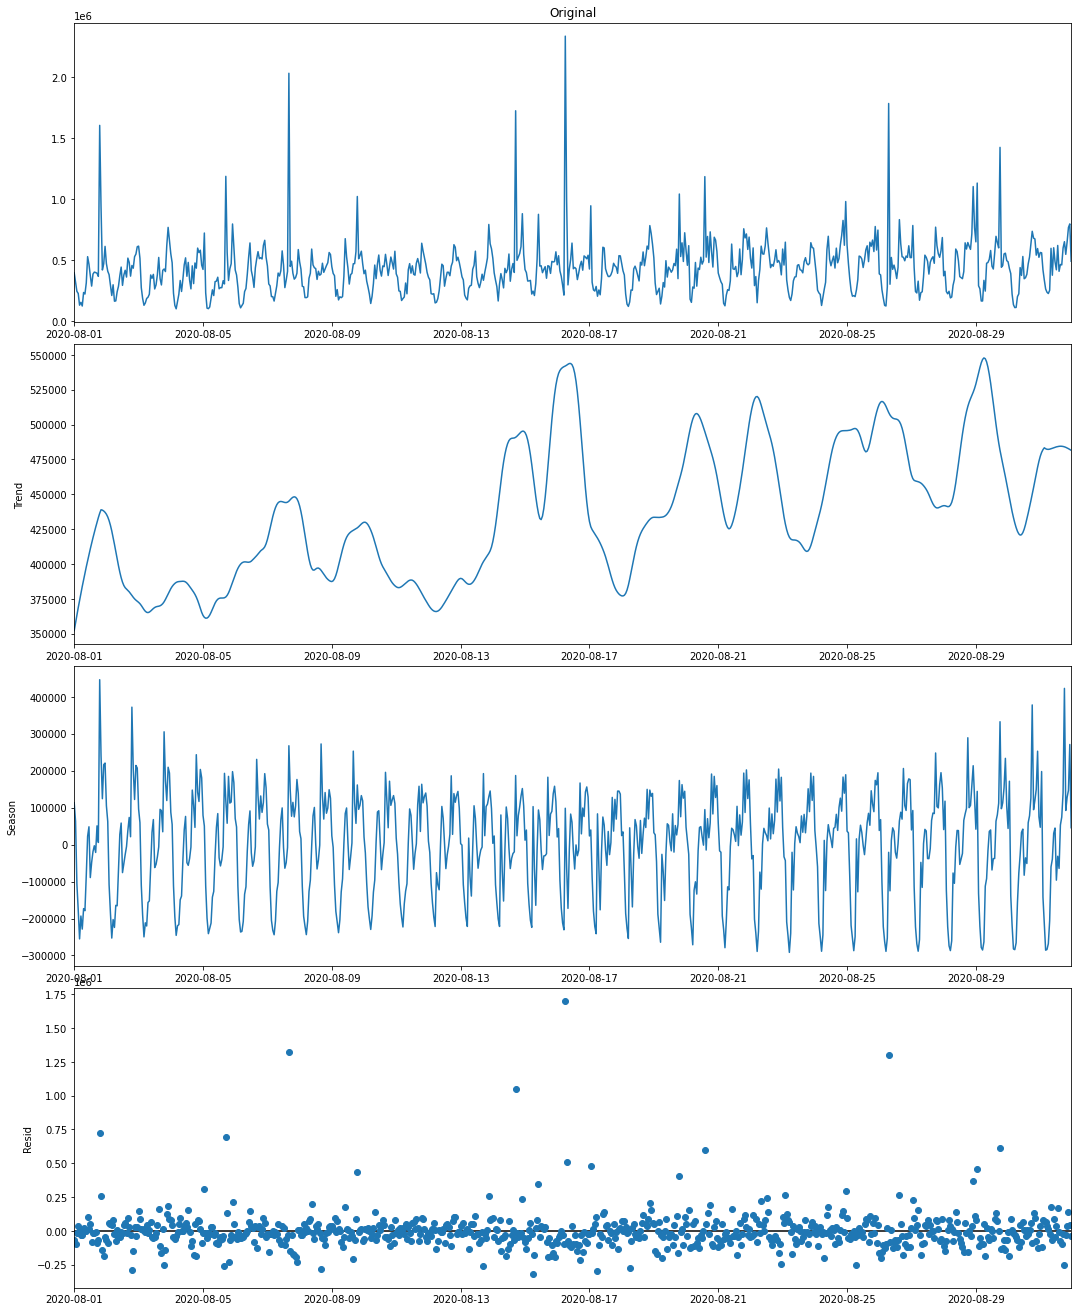

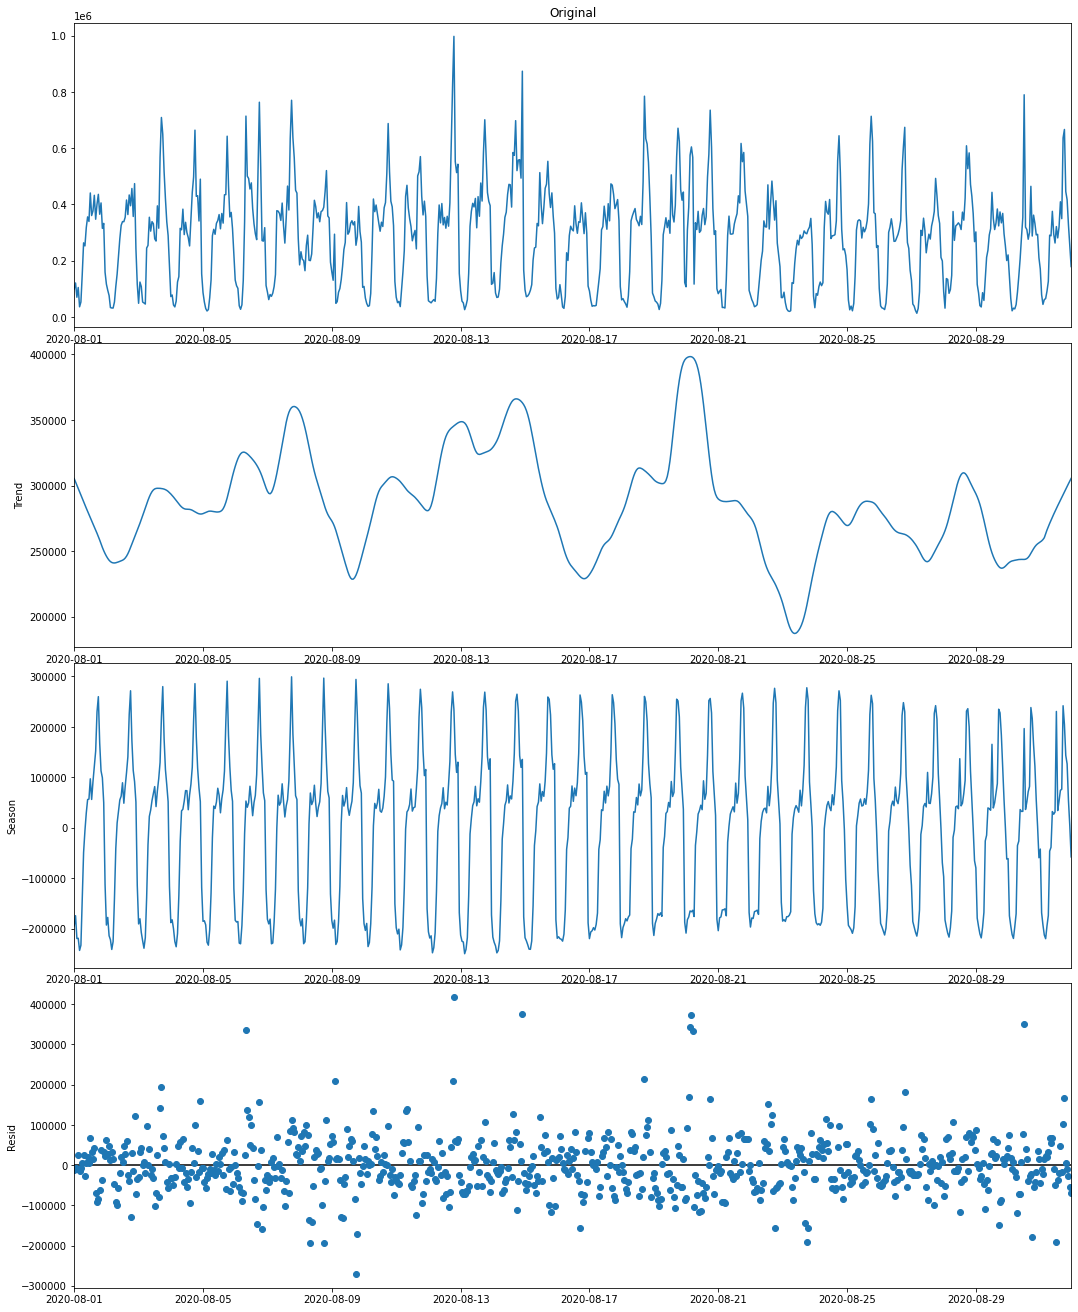

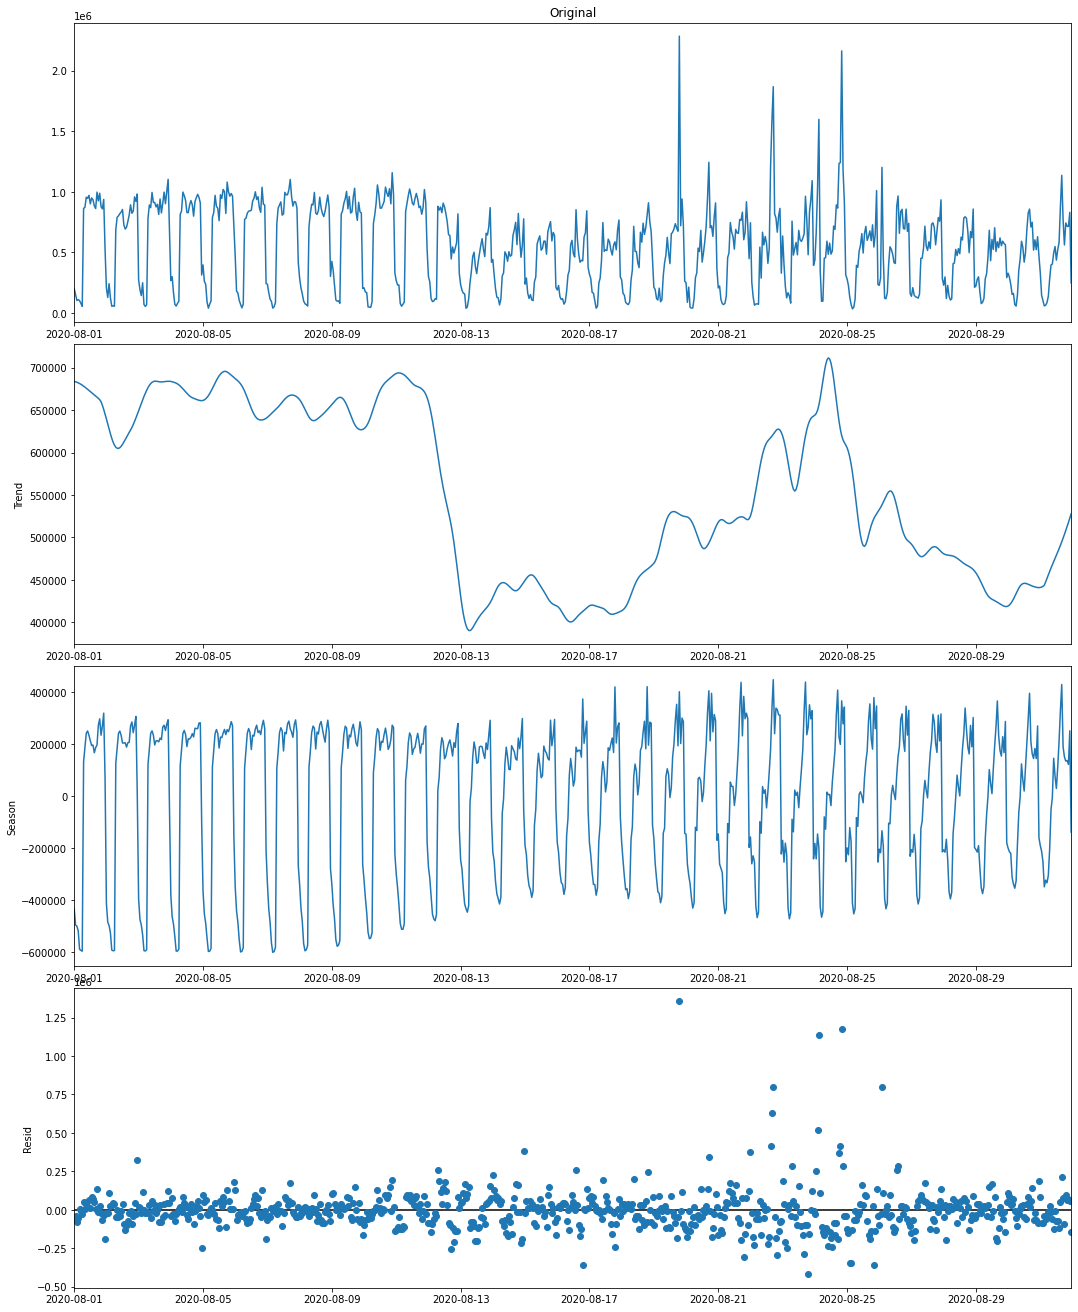

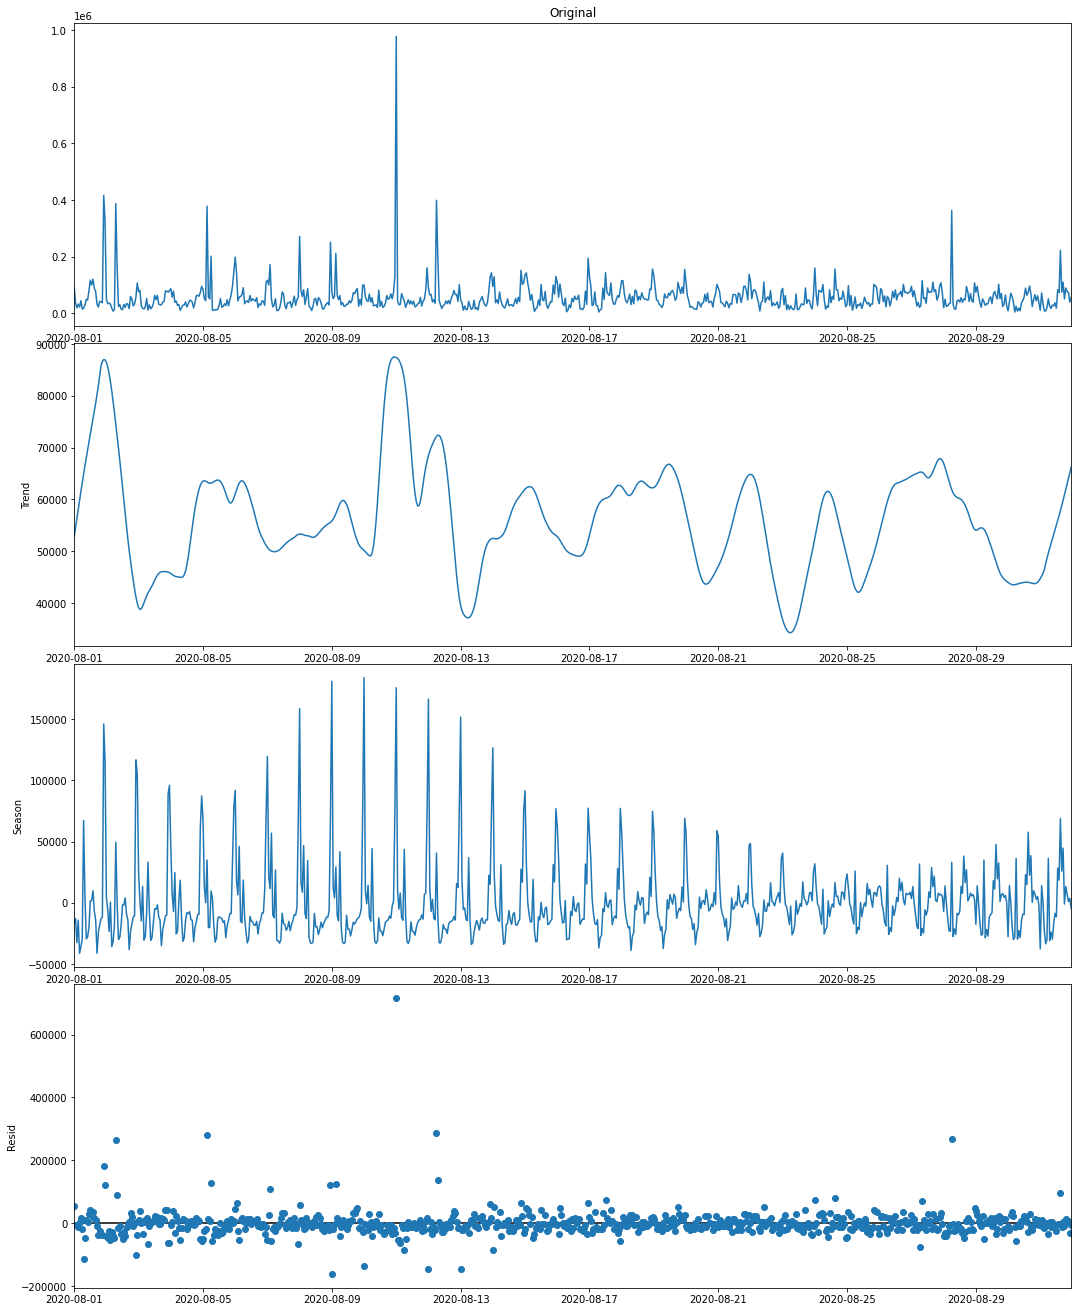

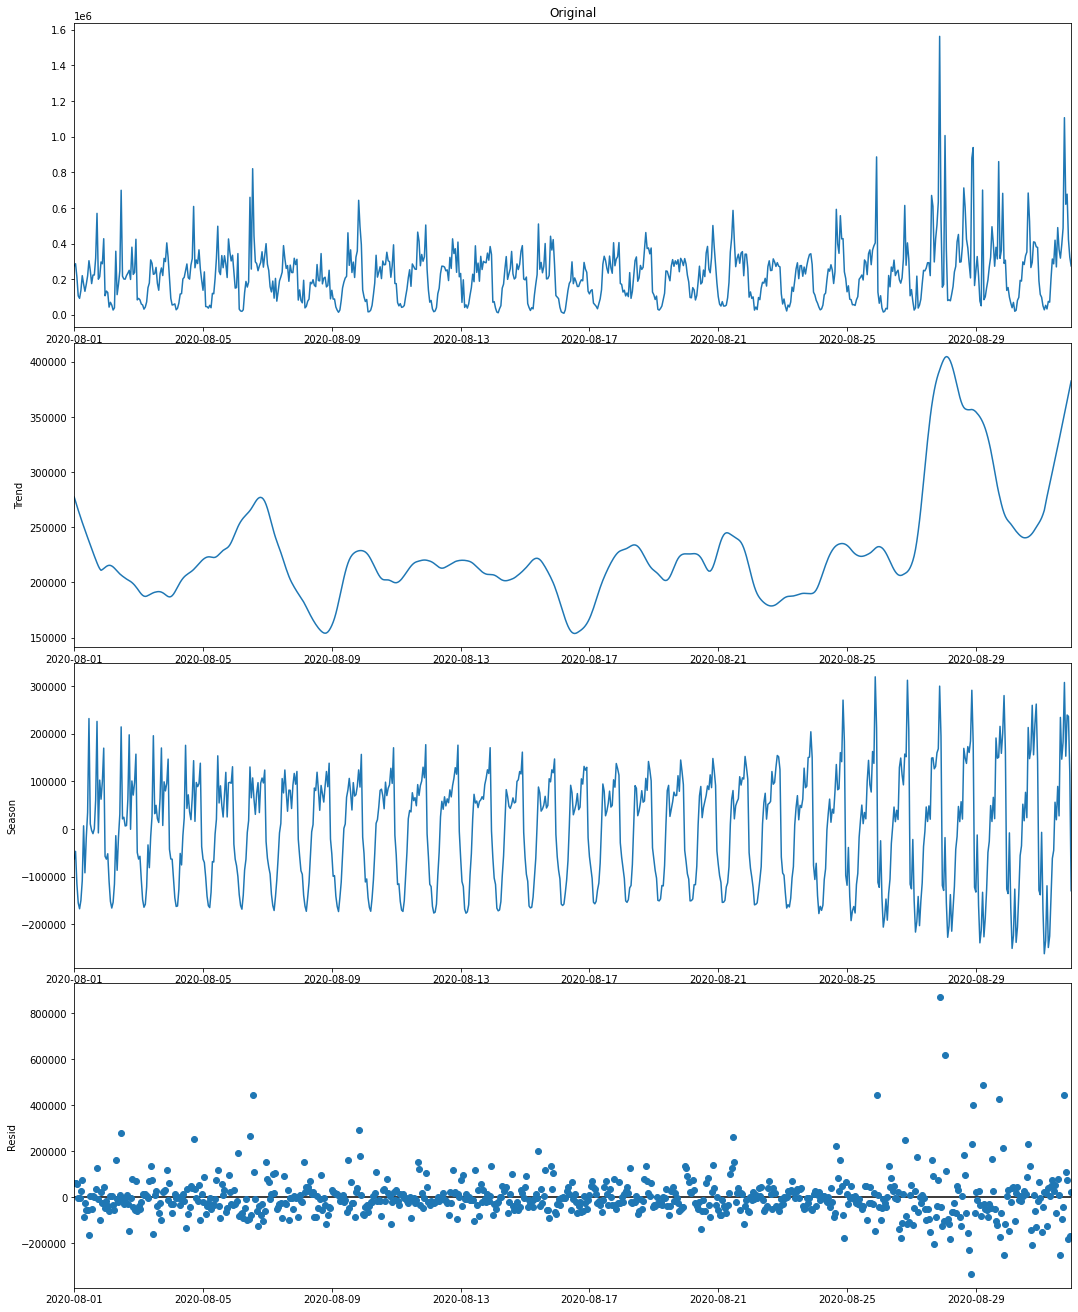

In [ ]:
# http://incredible.ai/time-series/2021/06/01/Time-Series-Decomposition/
# https://github.com/LeeDoYup/RobustSTL
# https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html
from statsmodels.tsa.seasonal import STL

for i in range(len(dfs)):
    decomposition = STL(dfs[i]['Original'], seasonal=13) # 시계열 분해, decompostion
    res=decomposition.fit()
    #그래프 그리기.
    fig=res.plot()
    #plt.title()
    fig.set_size_inches(15,18)

    dfs[i]['Trend']=res.trend
    dfs[i]['Seasonal']=res.seasonal
    dfs[i]['Detrend']=(dfs[i]['Original'] - res.trend)

In [ ]:
num = 5 # 확인해보려는 기지국 번호

test_cutoff_date = dfs[num-1].index.max() - timedelta(days=7)

dfs_test = dfs[num-1][df.index > test_cutoff_date]
dfs_train = dfs[num-1][df.index <= test_cutoff_date]

In [ ]:
dfs_train

,Original,Trend,Seasonal,Detrend
2020-08-01 00:00:00,99472,305244.949437,-194442.548026,-205772.949437
2020-08-01 01:00:00,120866,302722.954158,-174259.714957,-181856.954158
2020-08-01 02:00:00,70128,300200.213014,-219497.759207,-230072.213014
2020-08-01 03:00:00,104827,297678.932490,-219009.168425,-192851.932490
2020-08-01 04:00:00,36188,295161.793353,-243098.916909,-258973.793353
...,...,...,...,...
2020-08-24 19:00:00,513967,274773.776111,252413.635505,239193.223889
2020-08-24 20:00:00,311338,273408.097165,93593.724456,37929.902835
2020-08-24 21:00:00,238687,272079.789486,51747.898962,-33392.789486
2020-08-24 22:00:00,242455,270876.382373,-4057.747458,-28421.382373


In [ ]:
#scaler to normalize the dataset
# https://medium.com/analytics-vidhya/time-series-forecasting-predicting-mobile-traffic-with-lstm-649e6ba7ee49 참조.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) #Original 데이터를 위한 scaler
scaler_t = MinMaxScaler(feature_range = (0, 1)) #Trend 데이터를 위한 scaler
scaler_s = MinMaxScaler(feature_range = (0, 1)) #Seasonal 데이터를 위한 scaler
scaler_d = MinMaxScaler(feature_range = (0, 1)) #Detrend 데이터를 위한 scaler

#train 데이터에 맞게 scaler fit
scaler.fit(pd.DataFrame(dfs_train['Original']))
scaler_t.fit(pd.DataFrame(dfs_train['Trend']))
scaler_s.fit_transform(pd.DataFrame(dfs_train['Seasonal']))
scaler_d.fit_transform(pd.DataFrame(dfs_train['Detrend']))

array([[0.11900397],
       [0.1435594 ],
       [0.09405502],
       [0.13227045],
       [0.06438071],
       [0.08455101],
       [0.18825397],
       [0.30542716],
       [0.29696756],
       [0.3661661 ],
       [0.40786703],
       [0.39379581],
       [0.50016504],
       [0.42025102],
       [0.4396564 ],
       [0.49896215],
       [0.41405599],
       [0.47139719],
       [0.50994118],
       [0.4400238 ],
       [0.48426561],
       [0.39420747],
       [0.41493918],
       [0.23883833],
       [0.19724293],
       [0.17683121],
       [0.15917282],
       [0.11619694],
       [0.11527162],
       [0.11543945],
       [0.13755175],
       [0.19351954],
       [0.2392742 ],
       [0.30564645],
       [0.3672724 ],
       [0.41577277],
       [0.4289352 ],
       [0.42786962],
       [0.44311923],
       [0.50459897],
       [0.44956316],
       [0.51878517],
       [0.4768146 ],
       [0.53706851],
       [0.43221721],
       [0.54941478],
       [0.30949825],
       [0.176

In [ ]:
#Train 데이터 normalize
dfs_train['Original'] = scaler.transform(pd.DataFrame(dfs_train['Original']))
dfs_train['Trend'] = scaler_t.transform(pd.DataFrame(dfs_train['Trend']))
dfs_train['Seasonal'] = scaler_s.transform(pd.DataFrame(dfs_train['Seasonal']))
dfs_train['Detrend'] = scaler_d.transform(pd.DataFrame(dfs_train['Detrend']))

#Test 데이터 normalize
dfs_test['Original'] = scaler.transform(pd.DataFrame(dfs_test['Original']))
dfs_test['Trend'] = scaler_t.transform(pd.DataFrame(dfs_test['Trend']))
dfs_test['Seasonal'] = scaler_s.transform(pd.DataFrame(dfs_test['Seasonal']))
dfs_test['Detrend'] = scaler_d.transform(pd.DataFrame(dfs_test['Detrend']))

<ipython-input-16-8488037ee1e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_train['Original'] = scaler.transform(pd.DataFrame(dfs_train['Original']))
<ipython-input-16-8488037ee1e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_train['Trend'] = scaler_t.transform(pd.DataFrame(dfs_train['Trend']))
<ipython-input-16-8488037ee1e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
from numpy import array

#Original 데이터 split
def split_sequence(sequence, n_steps): #sequence 624개
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    #print(end_ix)
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y = sequence.iloc[i:end_ix,0], sequence.iloc[end_ix,0] # 0:30데이터, :
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

#trend 데이터 split
def split_sequence_t(sequence, n_steps): #sequence 624개
  X1, y1 = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    #print(end_ix)
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y = sequence.iloc[i:end_ix,1], sequence.iloc[end_ix,1] # 0:30데이터, :
    X1.append(seq_x)
    y1.append(seq_y)
  return array(X1), array(y1)

#seasonal 데이터 split
def split_sequence_s(sequence, n_steps): #sequence 624개
  X2, y2 = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    #print(end_ix)
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y = sequence.iloc[i:end_ix,2], sequence.iloc[end_ix,2] # 0:30데이터, :
    X2.append(seq_x)
    y2.append(seq_y)
  return array(X2), array(y2)

#Detrend 데이터 split
def split_sequence_d(sequence, n_steps): #sequence 624개
  X3, y3 = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    #print(end_ix)
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y = sequence.iloc[i:end_ix,3], sequence.iloc[end_ix,3] # 0:30데이터, :
    X3.append(seq_x)
    y3.append(seq_y)
  return array(X3), array(y3)

raw_seq = dfs_train
n_steps = 24

#Original 데이터
train_X, train_Y = split_sequence(raw_seq, n_steps)
test_X, test_Y =split_sequence(dfs_test, n_steps)

#trend 데이터
train_Xt, train_Yt = split_sequence_t(raw_seq, n_steps)
test_Xt, test_Yt = split_sequence_t(dfs_test, n_steps)

#seasonal 데이터
train_Xs, train_Ys = split_sequence_s(raw_seq, n_steps)
test_Xs, test_Ys = split_sequence_s(dfs_test, n_steps)

#detrend 데이터
train_Xd, train_Yd = split_sequence_d(raw_seq, n_steps)
test_Xd, test_Yd = split_sequence_d(dfs_test, n_steps)

n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
train_Xt = train_Xt.reshape((train_Xt.shape[0], train_Xt.shape[1], n_features))
train_Xs = train_Xs.reshape((train_Xs.shape[0], train_Xs.shape[1], n_features)) 
train_Xd = train_Xd.reshape((train_Xd.shape[0], train_Xd.shape[1], n_features)) 

test_X= test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
test_Xt= test_Xt.reshape((test_Xt.shape[0], test_Xt.shape[1], n_features))
test_Xs= test_Xs.reshape((test_Xs.shape[0], test_Xs.shape[1], n_features))
test_Xd = test_Xd.reshape((test_Xd.shape[0], test_Xd.shape[1], n_features))

train_Y = train_Y.reshape((train_Y.shape[0], n_features))
train_Yt = train_Yt.reshape((train_Yt.shape[0], n_features)) 
train_Ys = train_Ys.reshape((train_Ys.shape[0], n_features))
train_Yd = train_Yd.reshape((train_Yd.shape[0], n_features)) 

test_Y= test_Y.reshape((test_Y.shape[0], n_features))
test_Yt= test_Yt.reshape((test_Yt.shape[0], n_features))
test_Ys= test_Ys.reshape((test_Ys.shape[0], n_features))
test_Yd = test_Yd.reshape((test_Yd.shape[0], n_features))

In [ ]:
#모델 
#data 1 : Original 데이터 분석
#data 2 : Trend 데이터 분석
#data 3 : Seasonal 데이터 분석
#data 4 : Detrend 데이터 분석

#mode 2개: LSTM, CNN

def pred_model(data, mode):
    if data == 1:
        #Original 데이터 모델
        model = keras.Sequential()
        if mode == "LSTM":
                        # 요약된 정보의 차원 갯수, 요약을 할 time window의 크기.              #24, 1
            model.add(layers.LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape=(n_steps, 1))) #, return_sequences=True
            model.add(layers.LSTM(units = 64, activation = 'relu'))
            model.add(layers.Dense(50))
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        elif mode == "CNN":
            model.add(layers.Conv1D(
                filters=128, kernel_size=2, activation='relu', input_shape=(n_steps, 1))) # 23 (2개씩 1~30까지 보는데 마지막은 2개가 안되기때문에 총 23개), 64
            model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            model.add(layers.Conv1D(filters=128,kernel_size=2))
            model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            model.add(layers.Flatten()) # 512
            model.add(layers.Dense(50)) # 뉴럴 네트워크
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        # 그라이언트를 계산
        model.compile(optimizer= 'adam', loss='mse', metrics=['mae'])
        model.summary()

    elif data == 2:
        #Trend 데이터 모델
        model = keras.Sequential()
        if mode == "LSTM":
                        # 요약된 정보의 차원 갯수, 요약을 할 time window의 크기.              #24, 1
            # model.add(layers.LSTM(units = 128, activation = 'relu', input_shape=(n_steps, 1))) #, return_sequences=True
            model.add(layers.LSTM(units = 64, activation = 'relu', input_shape=(n_steps, 1)))
            model.add(layers.Dense(50))
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        elif mode == "CNN":
            model.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n_steps, 1))) # 23 (2개씩 1~30까지 보는데 마지막은 2개가 안되기때문에 총 23개), 64
            model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            model.add(layers.Conv1D(filters=512,kernel_size=2))
            model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            # model.add(layers.Conv1D(filters=256,kernel_size=2))
            # model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            model.add(layers.Flatten()) # 512
            model.add(layers.Dense(50)) # 뉴럴 네트워크
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        # 그라이언트를 계산
        model.compile(optimizer= 'adam', loss='mse', metrics=['mae'])
        model.summary()

    elif data == 3:
        #Seasonal 데이터 모델
        model = keras.Sequential()
        if mode == "LSTM":
                        # 요약된 정보의 차원 갯수, 요약을 할 time window의 크기.              #24, 1
            model.add(layers.LSTM(units = 64, activation = 'relu', return_sequences=True, input_shape=(n_steps, 1))) #, return_sequences=True
            model.add(layers.LSTM(units = 64, activation = 'relu', input_shape=(n_steps, 1)))
            model.add(layers.Dense(50))
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        elif mode == "CNN":
            model.add(layers.Conv1D(
                filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 1))) # 23 (2개씩 1~30까지 보는데 마지막은 2개가 안되기때문에 총 23개), 64
            model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            model.add(layers.Flatten()) # 512
            model.add(layers.Dense(50)) # 뉴럴 네트워크
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        # 그라이언트를 계산
        model.compile(optimizer= 'adam', loss='mse', metrics=['mae'])
        model.summary()

    elif data == 4:
        #Detrend 데이터 모델
        if mode == "LSTM":
            model = keras.Sequential()
            #                # 요약된 정보의 차원 갯수, 요약을 할 time window의 크기.              #24, 1
            model.add(layers.LSTM(units = 64, activation = 'relu', input_shape=(n_steps, 1))) #, return_sequences=True
            # model.add(layers.LSTM(units = 128, activation = 'relu'))
            model.add(layers.Dense(50))
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        elif mode == "CNN":
            model.add(layers.Conv1D(
                filters=128, kernel_size=2, activation='relu', input_shape=(n_steps, 1))) # 23 (2개씩 1~30까지 보는데 마지막은 2개가 안되기때문에 총 23개), 64
            model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            model.add(layers.Conv1D(filters=128,kernel_size=2))
            model.add(layers.MaxPooling1D(pool_size=2)) # 11,64
            model.add(layers.Flatten()) # 512
            model.add(layers.Dense(50)) # 뉴럴 네트워크
            model.add(layers.Dropout(0.5))
            model.add(layers.Dense(1))
        # 그라이언트를 계산
        model.compile(optimizer= 'adam', loss='mse', metrics=['mae'])
        model.summary()
    return model

In [ ]:
#모델 지정
#mode 1 : Original 데이터 분석
#mode 2 : Trend 데이터 분석
#mode 3 : Seasonal 데이터 분석
#mode 4 : Detrend 데이터 분석

model = pred_model(1, "LSTM")
model_t = pred_model(2, "LSTM")
model_s = pred_model(3, "CNN")
model_d = pred_model(4, "LSTM")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 64)            16896     
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 50)                3250      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 53,221
Trainable params: 53,221
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
____________________________

In [ ]:
#결과를 저장할 list
Original_time = list()
Original_result = list()
Seasonal_time = list()
Seasonal_result = list()
Detrend_time = list()
Detrend_result = list()

In [ ]:
#모델 학습
#머신러닝에서는 최적화를 위해 여러 번의 학습 과정을 거치는데 한번에 모든 양의 데이터를 넣지 않고 데이터를 나눠서 학습시키는데 필요한 개념이 batch size, epoch, iteration입니다
#역전파 알고리즘은 입력부터 출력까지의 각 계층 weight 계산을 해주는 순방향 패스와, 거슬러 올라가며 다시 한번 계산하여 기존 weight를 수정하는 역방향 패스로 나뉩니다.
#이때 1 epoch은 순방향 + 역방향 한번을 포함한 의미입니다.
#batch size는 나눠진 데이터 셋을 의미하는데, 만약 700개의 데이터를 7개의 배치를 만들어서 학습시킴 -> batch_size = 100
#batch_size는 병렬 연산에서 한번에 사용하는 데이터 개수.
#iteration은 1 epoch를 마치는데 필요한 미니배치 갯수를 의미합니다.
#미니배치 사이즈를 크게 하면 peak-acc 값을 높일 수 있지만, 작게 하면 전반적인 정확도의 안정성을 높일 수 있다.
#미니배치 사이즈에 대한 논문이 여러 편 있으니 읽어볼 것.

import datetime #시간 측정 모듈

time1 = datetime.datetime.now()
hist=model.fit(train_X, train_Y, batch_size=32, epochs = 50, validation_data = (test_X, test_Y), verbose = 0) #아마 데이터가 546개이니 iteration = 18이 되려나?
time2 = datetime.datetime.now()
hist_t=model_t.fit(train_Xt, train_Yt, batch_size=32, epochs = 50, validation_data = (test_Xt, test_Yt), verbose = 0)
time3 = datetime.datetime.now()
hist_s=model_s.fit(train_Xs, train_Ys, batch_size=32, epochs = 50, validation_data = (test_Xs, test_Ys), verbose = 0)
time4 = datetime.datetime.now()
hist_d=model_d.fit(train_Xd, train_Yd, batch_size=32, epochs = 50, validation_data = (test_Xd, test_Yd), verbose = 0)
time5 = datetime.datetime.now()

Original_t = time2 - time1
Trend_t = time3-time2
Seasonal_t = time4 - time3
Detrend_t = time5 - time4

Original_time.append(Original_t)
Seasonal_time.append(Trend_t + Seasonal_t)
Detrend_time.append(Trend_t + Detrend_t)

In [ ]:
#학습한 모델을 통해 얼마나 예측을 잘 할 수 있는지 확인하는 과정
pred = model.predict(test_X)
pred_t = model_t.predict(test_Xt)
pred_s = model_s.predict(test_Xs)
pred_d = model_d.predict(test_Xd)

5/5 [==============================] - 0s 5ms/step


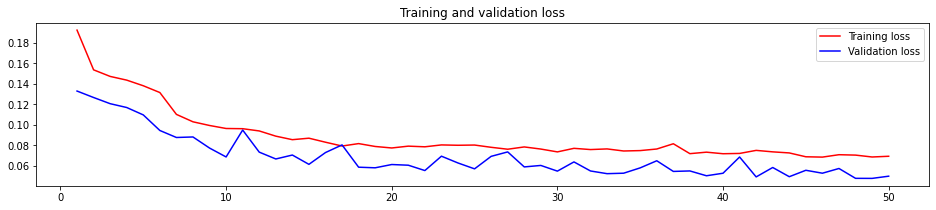

In [ ]:
plt.rcParams['figure.figsize'] = (16, 3)
loss = hist.history['mae']
val_loss = hist.history['val_mae']

epochs = range(1,50 + 1)

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#invert predictions
pred = scaler.inverse_transform(pred)
test_Y = scaler.inverse_transform(test_Y)

pred_t = scaler_t.inverse_transform(pred_t)
test_Yt = scaler_t.inverse_transform(test_Yt)

pred_s = scaler_s.inverse_transform(pred_s)
test_Ys = scaler_s.inverse_transform(test_Ys)

pred_d = scaler_d.inverse_transform(pred_d)
test_Yd = scaler_d.inverse_transform(test_Yd)

In [ ]:
#calcultae MAE
from sklearn.metrics import mean_absolute_error
Original_mae = mean_absolute_error(test_Y[:,0], pred[:,0])

In [ ]:
#시계열 분해를 사용했을 때 
Seasonal_mae = np.mean(np.abs(pred_t+pred_s - test_Y))
Detrend_mae = np.mean(np.abs(pred_t+pred_d - test_Y))

In [ ]:
#결과 저장용 list에 저장.
Original_result.append(Original_mae)
Seasonal_result.append(Seasonal_mae)
Detrend_result.append(Detrend_mae)

In [ ]:
print("Original\n")
print("time: ", Original_t)
print("result: ", Original_result)
print("\n")
print("Seasonal\n")
print("time: ", Seasonal_t)
print("result: ", Seasonal_result)
print("\n")
print("Detrend\n")
print("time: ", Detrend_t)
print("result: ", Detrend_result)

Original

time:  0:00:25.717581
result:  [48789.33056640625]


Seasonal

time:  0:00:05.585584
result:  [44762.6015625]


Detrend

time:  0:00:13.210401
result:  [90123.39729817708]


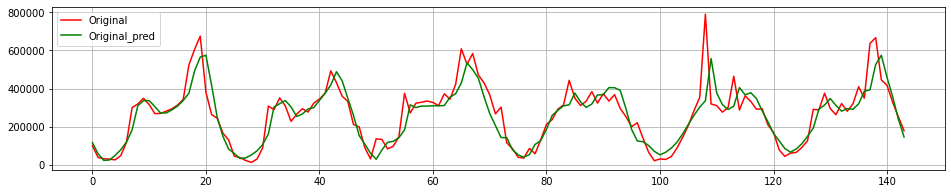

In [ ]:
#Original 비교
plt.plot(test_Y, color = 'red')
plt.plot(pred, color = 'green')
plt.legend(['Original', 'Original_pred'], loc = 'best')
plt.grid()
plt.show()

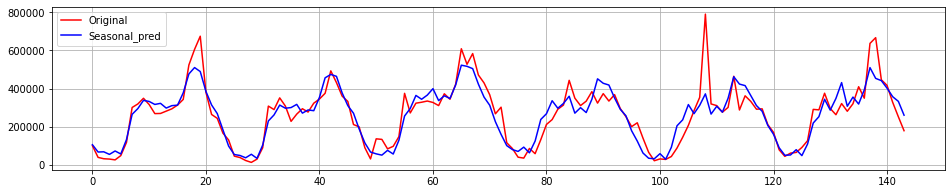

In [ ]:
#seasonal 비교
plt.plot(test_Y, color = 'red')
plt.plot(pred_t + pred_s, color = 'blue')
plt.legend(['Original','Seasonal_pred'], loc = 'best')
plt.grid()
plt.show()

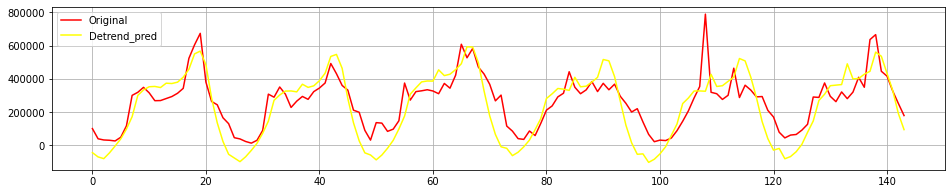

In [ ]:
#detrend 비교
plt.plot(test_Y, color = 'red')
plt.plot(pred_t + pred_d, color = 'yellow')
plt.legend(['Original','Detrend_pred'], loc = 'best')
plt.grid()
plt.show()

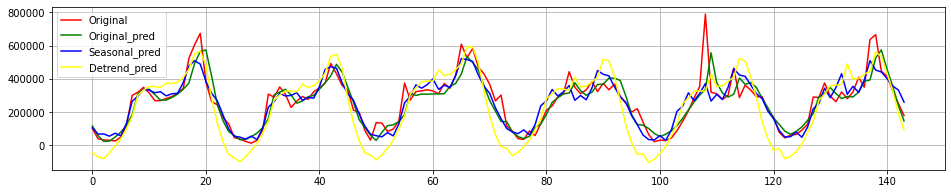

In [ ]:
plt.plot(test_Y, color = 'red')
plt.plot(pred, color = 'green')
plt.plot(pred_t + pred_s, color = 'blue')
plt.plot(pred_t + pred_d, color = 'yellow')
plt.legend(['Original', 'Original_pred','Seasonal_pred','Detrend_pred'], loc = 'best')
plt.grid()
plt.show()